# Council Website Hits Prediction

To predict the number of website hits - random Council data

In [1]:
# preparing the data for analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read Council_Website_Statistics csv file from folder
df = pd.read_csv('Council_Website_Statistics.csv', header=0)

In [4]:
df.head()

,Date,Page_Views
0,01-Sep-18,2778
1,02-Sep-18,2818
2,03-Sep-18,4519
3,04-Sep-18,4545
4,05-Sep-18,4107


In [5]:
df.dtypes

Date          object
Page_Views     int64
dtype: object

In [6]:
df.describe()

,Page_Views
count,1430.000000
mean,3689.348252
std,1779.745728
min,521.000000
25%,2333.500000
50%,3446.000000
75%,4737.000000
max,17401.000000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
df.head()

,Date,Page_Views
0,2018-09-01,2778
1,2018-09-02,2818
2,2018-09-03,4519
3,2018-09-04,4545
4,2018-09-05,4107


In [10]:
df.tail()

,Date,Page_Views
1425,2022-07-27,1510
1426,2022-07-28,1503
1427,2022-07-29,1870
1428,2022-07-30,985
1429,2022-07-31,973


In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Page_Views
Date,
2018-09-01,2778
2018-09-02,2818
2018-09-03,4519
2018-09-04,4545
2018-09-05,4107


In [13]:
# re-sample data

In [14]:
data = df.copy()

In [15]:
data.head()

,Page_Views
Date,
2018-09-01,2778
2018-09-02,2818
2018-09-03,4519
2018-09-04,4545
2018-09-05,4107


# Understand trend of page views by resampling data in various ways

Text(0, 0.5, 'Daily page views')

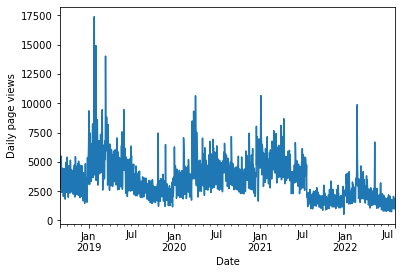

In [16]:
data['Page_Views'].plot()
plt.ylabel('Daily page views')

In [17]:
data2 = data['Page_Views']

In [18]:
data2.head()

Date
2018-09-01    2778
2018-09-02    2818
2018-09-03    4519
2018-09-04    4545
2018-09-05    4107
Name: Page_Views, dtype: int64

<AxesSubplot:xlabel='Date'>

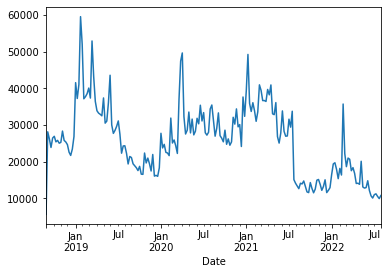

In [19]:
# resample sum of page views weekly
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

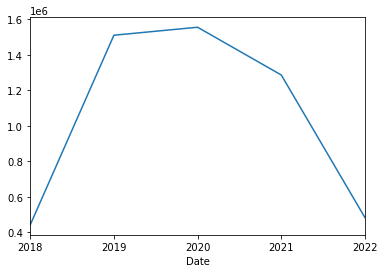

In [20]:
# resample sum page views yearly
data2.resample('Y').sum().plot()

<AxesSubplot:xlabel='Date'>

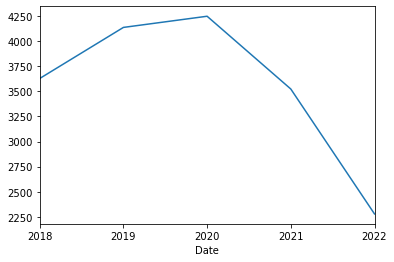

In [21]:
# resample average/mean page views yearly
data2.resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

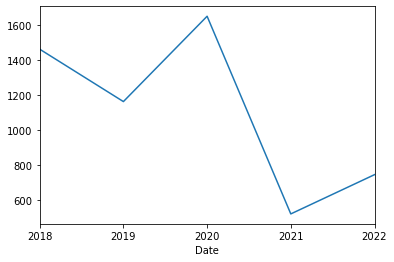

In [22]:
# resample minimum page views yearly
data2.resample('Y').min().plot()

<AxesSubplot:xlabel='Date'>

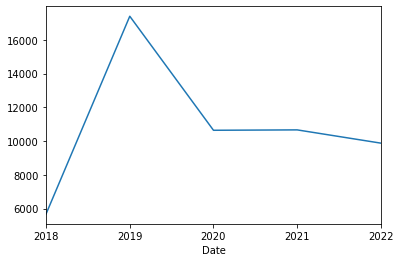

In [23]:
# resample maximum page views yearly
data2.resample('Y').max().plot()

# Analysing average/mean weekly page views

In [24]:
data2.index.dayofweek

Int64Index([5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=1430)

In [25]:
weekday = data.groupby(data2.index.dayofweek)['Page_Views'].mean()
weekday

Date
0    4385.348039
1    4228.098039
2    4038.063725
3    4228.828431
4    4022.632353
5    2394.678049
6    2539.770732
Name: Page_Views, dtype: float64

In [26]:
weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 

<AxesSubplot:>

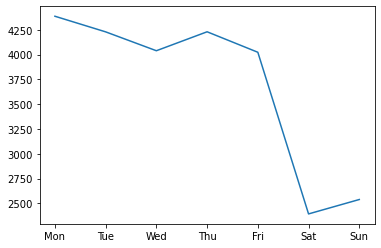

In [27]:
weekday.plot()

In [28]:
# Analysing average/mean page views by day

In [29]:
days = data2.index.dayofyear
days

Int64Index([244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
            ...
            203, 204, 205, 206, 207, 208, 209, 210, 211, 212],
           dtype='int64', name='Date', length=1430)

In [30]:
data.groupby(days)['Page_Views'].mean()

Date
1      4300.25
2      5635.25
3      4892.50
4      5251.00
5      5018.25
        ...   
362    3391.75
363    3624.25
364    4610.00
365    4389.00
366    5175.00
Name: Page_Views, Length: 366, dtype: float64

Text(0, 0.5, 'Average page views')

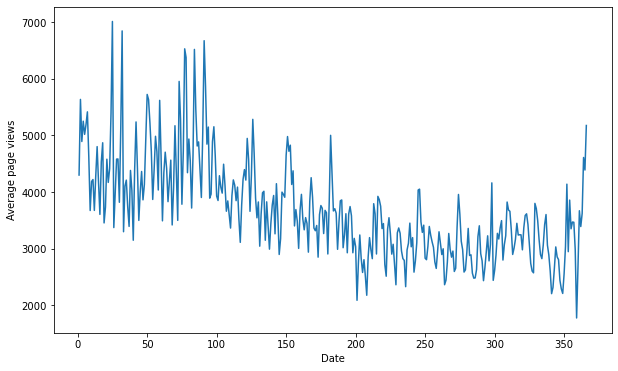

In [31]:
plt.figure(figsize=(10,6))
data.groupby(days)['Page_Views'].mean().plot()
plt.ylabel('Average page views')

# Analysing trend of page views - weekdays v weekends

In [32]:
data['dayofweek'] = data.index.dayofweek

In [33]:
data.head()

,Page_Views,dayofweek
Date,,
2018-09-01,2778,5
2018-09-02,2818,6
2018-09-03,4519,0
2018-09-04,4545,1
2018-09-05,4107,2


In [34]:
def assign_labels(feature):
    if feature <5:
        return 'weekday'
    else:
        return 'weekend'

In [35]:
data['dayoftheweek'] = data['dayofweek'].apply(assign_labels)

In [36]:
data.head()

,Page_Views,dayofweek,dayoftheweek
Date,,,
2018-09-01,2778,5,weekend
2018-09-02,2818,6,weekend
2018-09-03,4519,0,weekday
2018-09-04,4545,1,weekday
2018-09-05,4107,2,weekday


<AxesSubplot:title={'center':'weekday'}, xlabel='Date'>

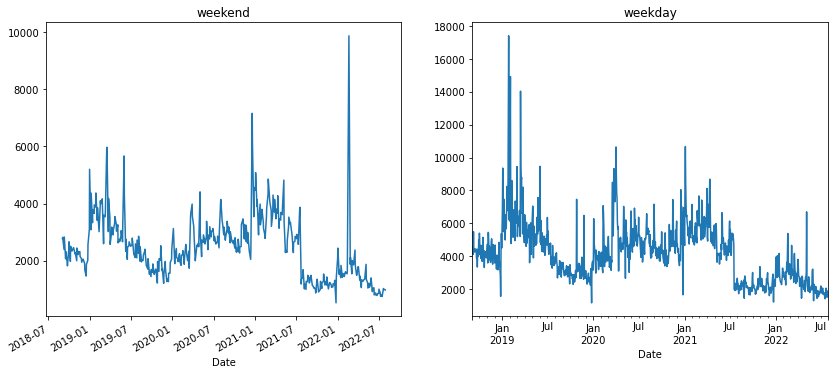

In [37]:
# 1 row, 2 columns
fig, ax = plt.subplots(1,2, figsize=(14,6))
data[data['dayoftheweek']=='weekend']['Page_Views'].plot(ax=ax[0], title='weekend')
data[data['dayoftheweek']=='weekday']['Page_Views'].plot(ax=ax[1], title='weekday')
# similar charts. lower total hits on weekends and bigger spikes/variation on weekday 

# Build baseline model - prediction using naive model

In [38]:
# create new column with shifted(by 1) values
data['prediction_naive'] = data['Page_Views'].shift(1)

In [39]:
data.head()

,Page_Views,dayofweek,dayoftheweek,prediction_naive
Date,,,,
2018-09-01,2778,5,weekend,NaN
2018-09-02,2818,6,weekend,2778.0
2018-09-03,4519,0,weekday,2818.0
2018-09-04,4545,1,weekday,4519.0
2018-09-05,4107,2,weekday,4545.0


<AxesSubplot:xlabel='Date'>

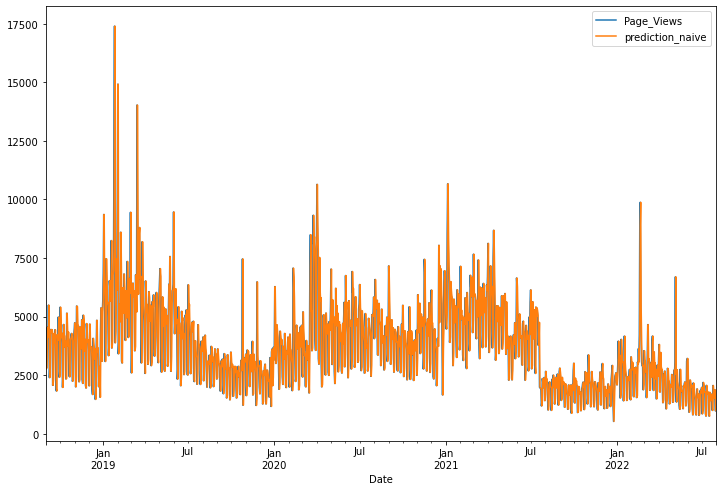

In [40]:
# difference between prediciton and actual values
data[['Page_Views', 'prediction_naive']].plot(figsize=(12,8))
# prediction_naive basically overlaps actual values

In [41]:
# to evaluate how the model is performing...
from sklearn.metrics import mean_squared_error

In [42]:
# [1:] to remove the first NaN value
np.sqrt(mean_squared_error(data['Page_Views'][1:], data['prediction_naive'][1:]))

1367.6030471125964

In [43]:
#1367.6030471125964 is the error value of the naive model - plus or minus difference between prediction and actual value
# but... previous data is not a true reflection of future data

# examine if there is seasonality or noise in the data

<AxesSubplot:xlabel='Date'>

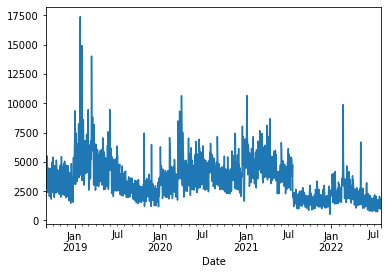

In [44]:
data['Page_Views'].plot()

In [45]:
mean = data['Page_Views'].rolling(window = 7).mean()
std = data['Page_Views'].rolling(window = 7).std()

In [46]:
# first 6 values are missing values
mean

Date
2018-09-01            NaN
2018-09-02            NaN
2018-09-03            NaN
2018-09-04            NaN
2018-09-05            NaN
                 ...     
2022-07-27    1520.571429
2022-07-28    1513.428571
2022-07-29    1539.571429
2022-07-30    1534.142857
2022-07-31    1531.571429
Name: Page_Views, Length: 1430, dtype: float64

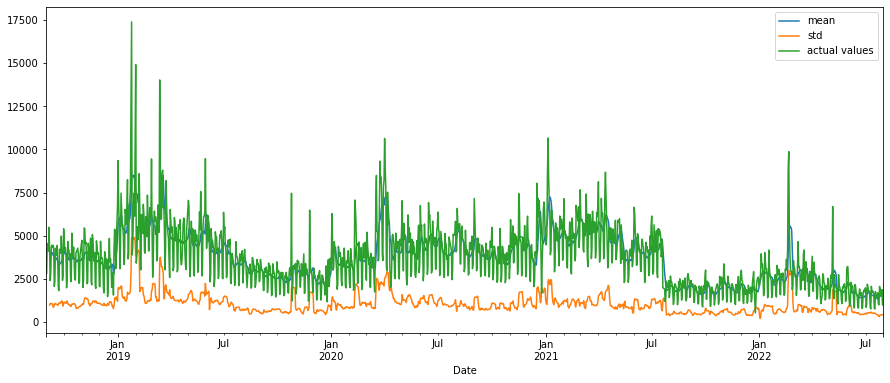

In [47]:
plt.figure(figsize= (15,6))
mean.plot(label = 'mean')
std.plot(label = 'std')
data['Page_Views'].plot(label = 'actual values')
plt.legend()
# rolling mean is not stationary and it changes with time - need to eliminate trend and seasonality

In [48]:
# Statistical tests to detect whether there is a seasonal or stationarity trend
# Augumented Dickie Fuller test - p value to define stationarity
from statsmodels.tsa.stattools import adfuller

In [49]:
# check for missing values
data['Page_Views'].isnull().sum()

0

In [50]:
adfuller(data['Page_Views'])

(-2.440473326223144,
 0.1306373408248508,
 24,
 1405,
 {'1%': -3.4350128381281606,
  '5%': -2.8635993123178385,
  '10%': -2.5678663696001824},
 23080.002304889204)

In [51]:
# p-value (second number) is less than 0.05 - strong evidence against null hypothesis, so data is stationary

In [52]:
# make the results more user-friendly to view
result = adfuller(data['Page_Views'])
labels = ['ADF Test Statistics', 'P-value', 'Lags', 'Number of observations']
for value, label in zip(result, labels):
    print('{} : {}'.format(label, value))

ADF Test Statistics : -2.440473326223144
P-value : 0.1306373408248508
Lags : 24
Number of observations : 1405


In [53]:
def test_for_stationarity(feature):
    mean = data[feature].rolling(window = 7).mean()
    std = data[feature].rolling(window = 7).std()
    
    plt.figure(figsize= (15,6))
    mean.plot(label = 'mean')
    std.plot(label = 'std')
    data[feature].plot(label = 'actual values')
    plt.legend()
    
    result = adfuller(data[feature].dropna())
    labels = ['ADF Test Statistics', 'P-value', 'Lags', 'Number of observations']
    for value, label in zip(result, labels):
        print('{} : {}'.format(label, value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis, reject, data is stationary')
    else:
        print('Evidence for null hypothesis, accept, data is non-stationary')

ADF Test Statistics : -2.440473326223144
P-value : 0.1306373408248508
Lags : 24
Number of observations : 1405
Evidence for null hypothesis, accept, data is non-stationary


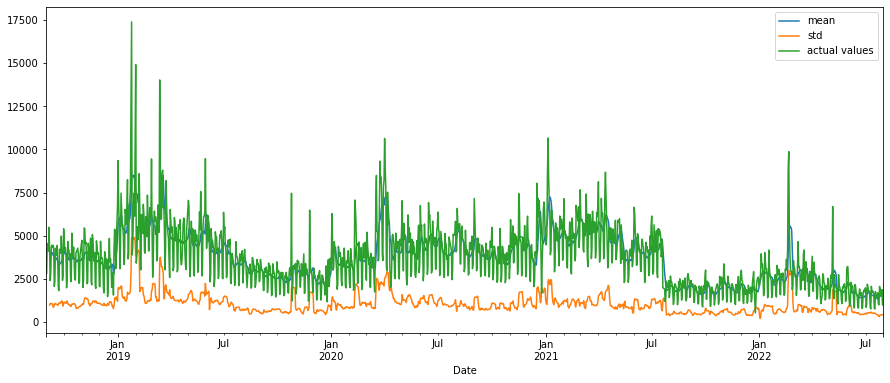

In [54]:
test_for_stationarity('Page_Views')

In [55]:
# eliminate trend from the data and smoothening series (moving average) to remove seasonality

In [56]:
log_data = np.log(data['Page_Views'])

<AxesSubplot:xlabel='Date'>

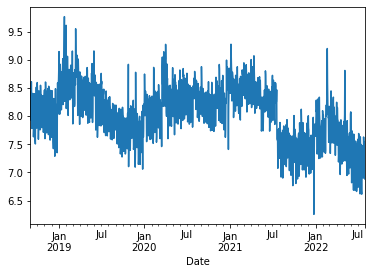

In [57]:
np.log(data['Page_Views']).plot()

In [58]:
rolling_avg = log_data - log_data.shift(7)

In [59]:
rolling_average = log_data.rolling(window=7).mean()

<function matplotlib.pyplot.legend(*args, **kwargs)>

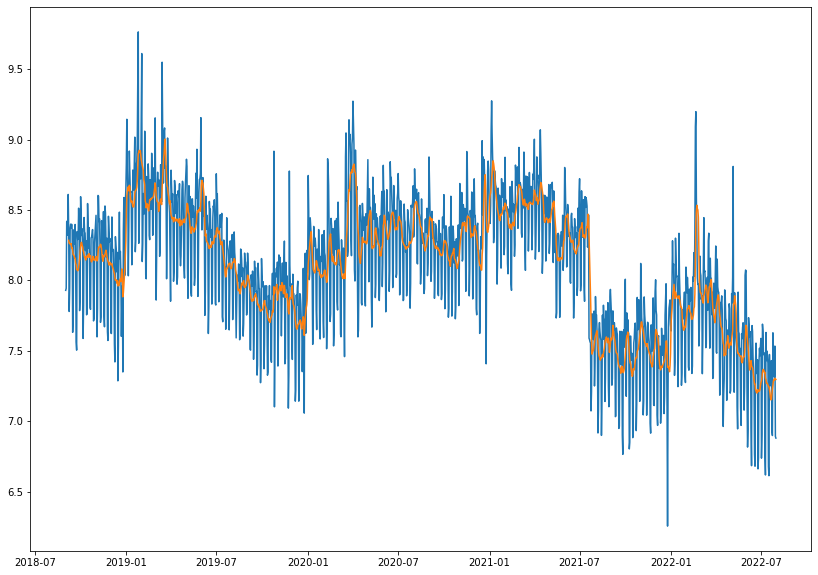

In [60]:
plt.figure(figsize=(14,10))
plt.plot(log_data, label = 'Log transformed')
plt.plot(rolling_average, label = 'Rolling average')
plt.legend

In [61]:
lr_diff = log_data - rolling_average

In [62]:
# very small differences between the log data and the rolling average
lr_diff

Date
2018-09-01         NaN
2018-09-02         NaN
2018-09-03         NaN
2018-09-04         NaN
2018-09-05         NaN
                ...   
2022-07-27    0.024852
2022-07-28    0.024880
2022-07-29    0.228643
2022-07-30   -0.407001
2022-07-31   -0.416640
Name: Page_Views, Length: 1430, dtype: float64

In [63]:
data['lr_diff'] = lr_diff

ADF Test Statistics : -10.387354826025879
P-value : 2.063394035199311e-18
Lags : 24
Number of observations : 1399
Strong evidence against null hypothesis, reject, data is stationary


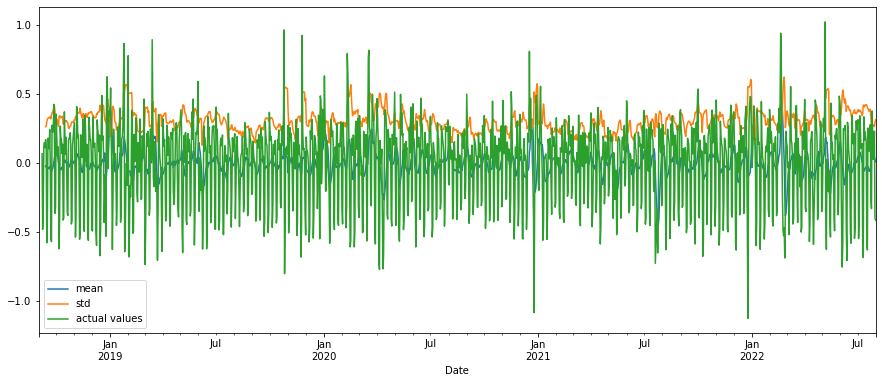

In [64]:
test_for_stationarity('lr_diff')

In [65]:
log_ts = log_data - log_data.shift(7)

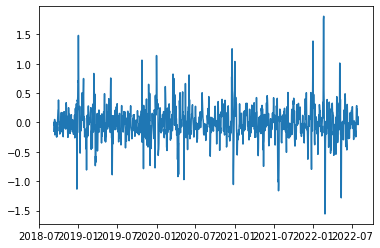

In [66]:
plt.plot(log_ts)

In [67]:
data['log_ts'] = log_ts

ADF Test Statistics : -9.773197286230435
P-value : 7.046267353654156e-17
Lags : 21
Number of observations : 1401
Strong evidence against null hypothesis, reject, data is stationary


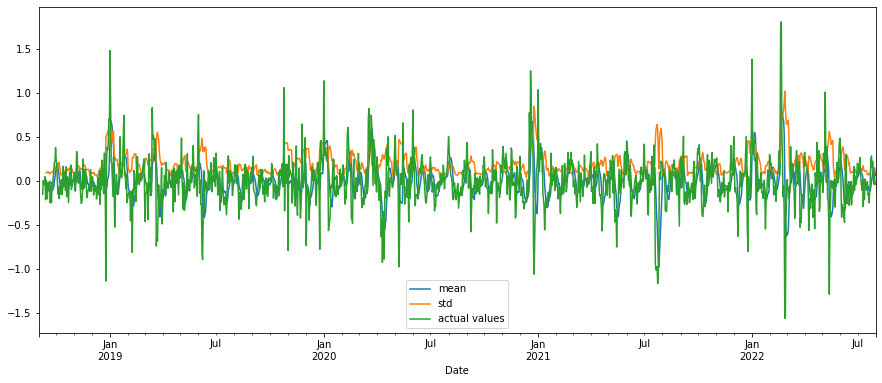

In [68]:
# time series is stationary with 99% confidence
test_for_stationarity('log_ts')

In [69]:
from prophet import Prophet

In [70]:
model = Prophet()

In [71]:
data.head()

,Page_Views,dayofweek,dayoftheweek,prediction_naive,lr_diff,log_ts
Date,,,,,,
2018-09-01,2778,5,weekend,NaN,NaN,NaN
2018-09-02,2818,6,weekend,2778.0,NaN,NaN
2018-09-03,4519,0,weekday,2818.0,NaN,NaN
2018-09-04,4545,1,weekday,4519.0,NaN,NaN
2018-09-05,4107,2,weekday,4545.0,NaN,NaN


In [72]:
df = data[['Page_Views']]

In [73]:
df.head()

,Page_Views
Date,
2018-09-01,2778
2018-09-02,2818
2018-09-03,4519
2018-09-04,4545
2018-09-05,4107


In [74]:
df = df.reset_index()

In [75]:
df.columns = ['ds','y']

In [76]:
df.head()

,ds,y
0,2018-09-01,2778
1,2018-09-02,2818
2,2018-09-03,4519
3,2018-09-04,4545
4,2018-09-05,4107


In [77]:
m = model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
future = m.make_future_dataframe(periods=500, freq='D')

In [79]:
future.head()

,ds
0,2018-09-01
1,2018-09-02
2,2018-09-03
3,2018-09-04
4,2018-09-05


In [80]:
data.shape

(1430, 6)

In [81]:
future.shape

(1930, 1)

In [82]:
forecast = m.predict(future)

In [83]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-01,4891.065477,1562.854869,3958.099317,4891.065477,4891.065477,-2180.065933,-2180.065933,-2180.065933,-1292.555371,-1292.555371,-1292.555371,-887.510563,-887.510563,-887.510563,0.0,0.0,0.0,2710.999544
1,2018-09-02,4889.552737,1521.693713,4112.511568,4889.552737,4889.552737,-2049.186382,-2049.186382,-2049.186382,-1144.884684,-1144.884684,-1144.884684,-904.301699,-904.301699,-904.301699,0.0,0.0,0.0,2840.366355
2,2018-09-03,4888.039998,3396.134588,5983.942762,4888.039998,4888.039998,-233.240092,-233.240092,-233.240092,687.342826,687.342826,687.342826,-920.582919,-920.582919,-920.582919,0.0,0.0,0.0,4654.799906
3,2018-09-04,4886.527258,3122.206986,5761.407160,4886.527258,4886.527258,-403.638251,-403.638251,-403.638251,532.525674,532.525674,532.525674,-936.163925,-936.163925,-936.163925,0.0,0.0,0.0,4482.889007
4,2018-09-05,4885.014518,3072.919459,5642.466495,4885.014518,4885.014518,-605.962142,-605.962142,-605.962142,344.922856,344.922856,344.922856,-950.884998,-950.884998,-950.884998,0.0,0.0,0.0,4279.052376


In [84]:
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail(10)
# yhat lower and upper are the bounds of the prediction

,ds,yhat,yhat_lower,yhat_upper
1920,2023-12-04,-2376.369950,-4627.704067,-232.249282
1921,2023-12-05,-2568.835747,-4768.877649,-538.179065
1922,2023-12-06,-2791.099590,-4992.357717,-584.956640
1923,2023-12-07,-2628.692201,-4820.373016,-441.136574
1924,2023-12-08,-2858.601846,-5023.548074,-591.845806
1925,2023-12-09,-4506.404416,-6757.674510,-2469.706785
1926,2023-12-10,-4373.319415,-6622.574177,-2202.245246
1927,2023-12-11,-2548.795947,-4623.614287,-417.428409
1928,2023-12-12,-2703.820117,-4861.621530,-620.164976
1929,2023-12-13,-2883.612394,-5176.619601,-792.133745


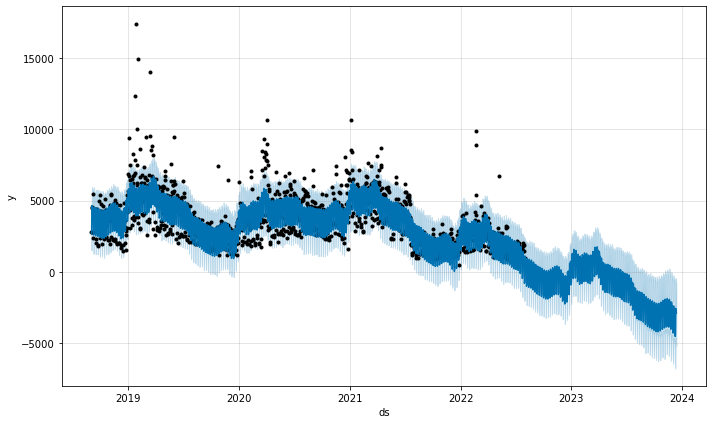

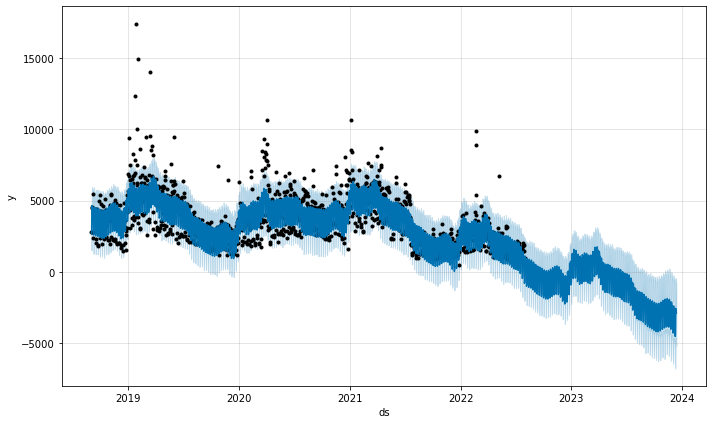

In [85]:
model.plot(forecast)

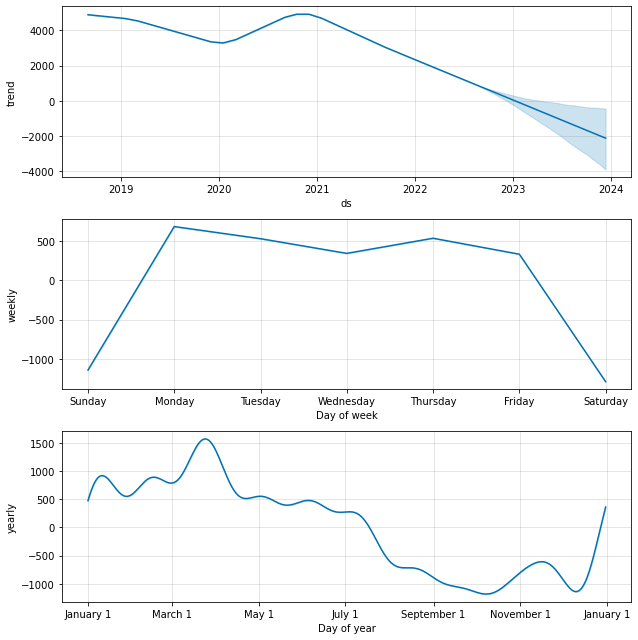

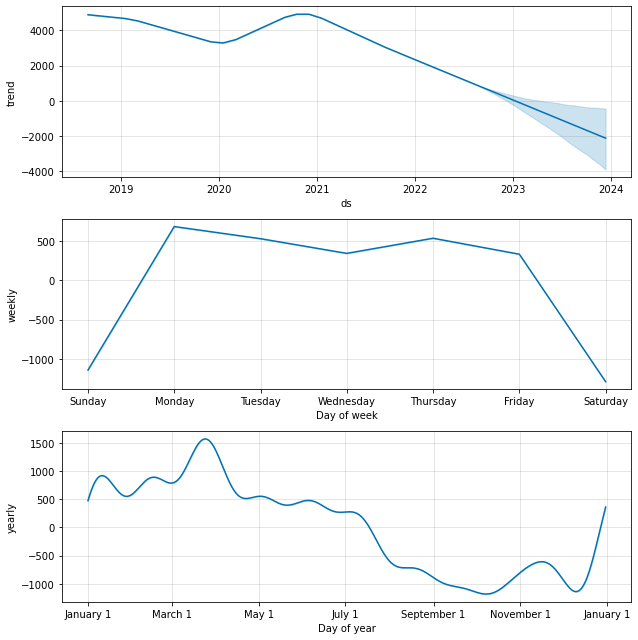

In [86]:
model.plot_components(forecast)

In [87]:
# cross validation on time series data
from prophet.diagnostics import cross_validation

In [88]:
df.shape

(1430, 2)

In [97]:
df_cv = cross_validation(model, horizon='365 days', period='180 days',initial='1000 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2021-07-31 00:00:00 and 2021-07-31 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
df_cv.shape

(365, 6)

In [99]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-08-01,1619.589127,289.400272,2936.764300,1682,2021-07-31
1,2021-08-02,3738.888585,2340.663718,5130.890983,2658,2021-07-31
2,2021-08-03,3562.023111,2210.569477,4879.574510,2320,2021-07-31
3,2021-08-04,3362.451944,1970.127204,4690.969803,2336,2021-07-31
4,2021-08-05,3636.731004,2327.752192,4889.247965,2093,2021-07-31


In [100]:
from prophet.plot import plot_cross_validation_metric

C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


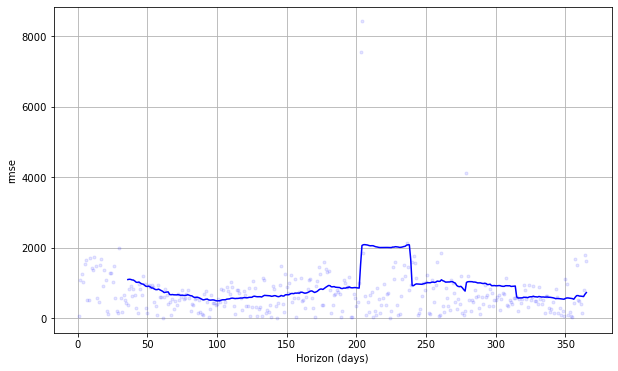

In [101]:
# root mean square error
fig = plot_cross_validation_metric(df_cv, metric='rmse')

C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Chloe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


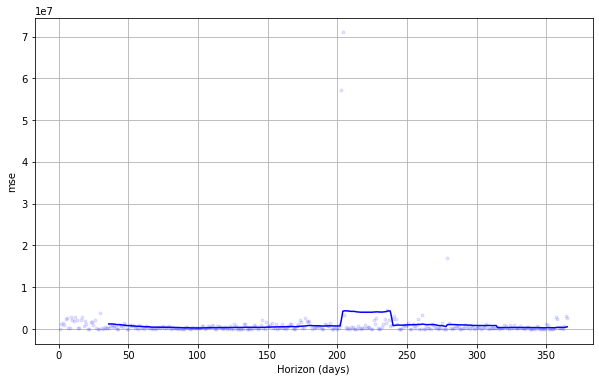

In [102]:
# mean squared error
fig = plot_cross_validation_metric(df_cv, metric='mse')